A heatmap can also be used to show the correlation between variables. A correlation represents how much one variable affects another variable. In the following example, you can see the correlation between variables.

This example uses the weather data from the weatherAus.csv https://myuni.adelaide.edu.au/courses/63752/files/8078193/download?wrap=1 file of the rain in Australia for 10 years (2007–2017).

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn library
%matplotlib inline
#Turn on seaborn styling
sns.set()

#import the data 
df = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])
#Show the first two rows 
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No


In [2]:
#here we use the spearman correlation coefficient from the scipy statistics library
from scipy.stats import spearmanr 

In [3]:
#Filtering the numeric columns (attributes)
#use a for loop to iterate over all of the columns in the data
#if the item is numeric, store its value in numerical_columns
#(n automatically increases)
numerical_columns = [n for n,col in df.items() if pd.api.types.is_numeric_dtype(col)]
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [4]:
#Getting the correlations between pairs of the numerical columns 
#the dropna() function of Pandas Data Frame drops all of the missing values
corr = spearmanr(df[numerical_columns].dropna()).correlation
corr

array([[ 1.        ,  0.76257505,  0.02390584,  0.58080368,  0.11409728,
         0.15917673,  0.14611424,  0.16269702, -0.17715206,  0.08534178,
        -0.50565212, -0.51869125,  0.0985816 ,  0.03991116,  0.90907219,
         0.73944716,  0.06818425],
       [ 0.76257505,  1.        , -0.28451157,  0.7058663 ,  0.49132138,
         0.06855662,  0.01731194,  0.04296335, -0.45567122, -0.40139023,
        -0.3899541 , -0.48440307, -0.26367573, -0.25973423,  0.90102448,
         0.98577466, -0.20468765],
       [ 0.02390584, -0.28451157,  1.        , -0.31226957, -0.39730694,
         0.12415541,  0.0720529 ,  0.07821931,  0.46928124,  0.45646123,
        -0.16154793, -0.07132844,  0.3681795 ,  0.32551027, -0.14584409,
        -0.29209435,  0.41750846],
       [ 0.58080368,  0.7058663 , -0.31226957,  1.        ,  0.45842222,
         0.25628496,  0.20368916,  0.17861439, -0.5727491 , -0.4053897 ,
        -0.34885932, -0.37920644, -0.21035495, -0.22399474,  0.67018961,
         0.68467275

## Plot Heatmap of the Correlations

The values (correlation coefficients) can now be plotted on a heatmap using the Seaborn heatmap() function.

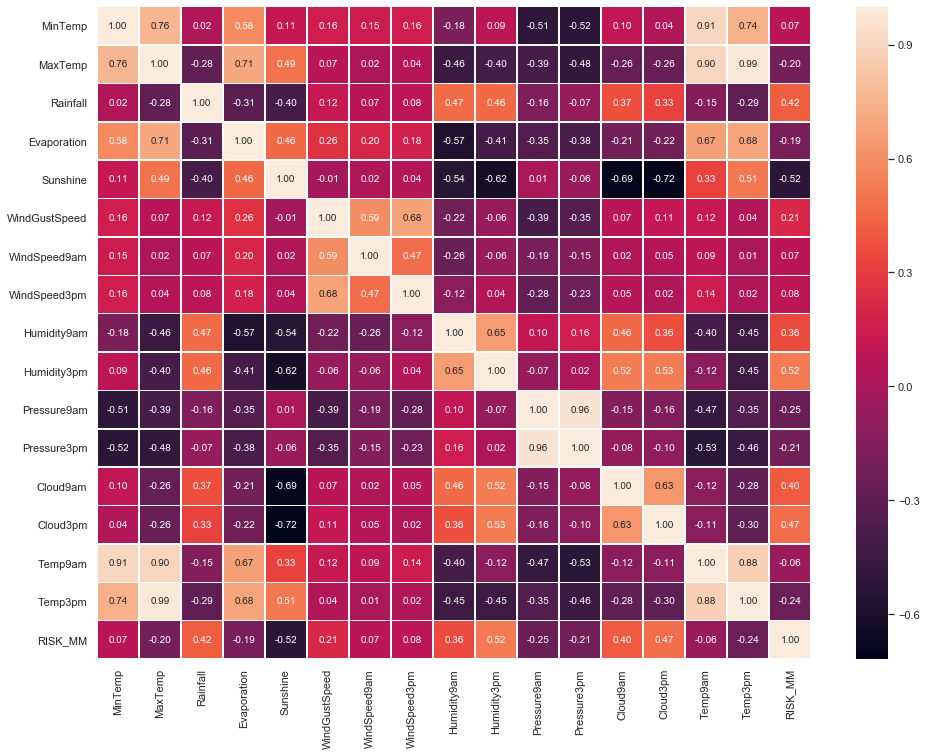

In [6]:
plt.figure(figsize=(16,12))

#in this case we have set the x and y labels as they are not part of the data
# corr only holds the values in an array (see above)
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=numerical_columns, yticklabels=numerical_columns) 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In this example, you can see the relationship between the numerical variables. The amount of correlation is also shown as a number between 1 and -1. A value of 1 means they are exactly the same values (a perfect line). A value of 0 would mean the values are not related. A value of -1 means they are perfectly correlated in a negative relationship. If you saw just the table with these values, it would be very hard notice which are the variables that are highly correlated. However, if you use a heatmap that shows you these values with colours, you can identify the values more easily. For example, let’s look at the 'evaporation' column.  Looking at the colours, it is evident that the lightest colour is in the row that is also labelled 'evaporation'.  Also, notice that the row for temperatures is light coloured  — evaporation is also strongly correlated with the temperature data.

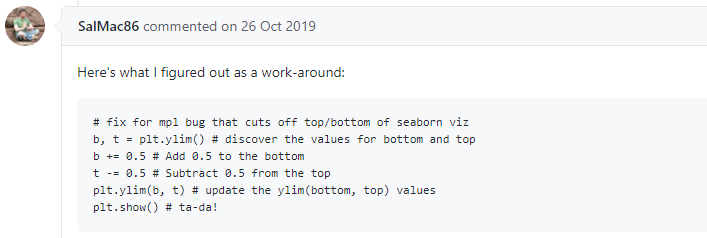